In [1]:
# python notebook for Make Your Own Neural Network
# code for a 3-layer neural network, and code for learning the MNIST dataset
# this version creates additional training examples by rotating each original by +/- 10 degrees
# (c) Tariq Rashid, 2016
# license is GPLv2

In [15]:
# numpy provides arrays and useful functions for working with them
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
# scipy.ndimage for rotating image arrays
import scipy.ndimage

In [16]:
# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [17]:
# number of input, hidden and output nodes
# input_nodes = 784
input_nodes = 960
hidden_nodes = 50
#output_nodes = 10
output_nodes = 2

# learning rate
learning_rate = 0.1

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [18]:
# load the mnist training data CSV file into a list
training_data_file = open("face_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [19]:
# train the neural network

'''
def make_small_img(in_img):
    out_img = numpy.zeros((28,28))
    in_img28 = in_img.reshape((28,28))
    for i in range(14):
        for j in range(14):
            out_img[i][j] = (in_img28[i*2][j*2]+in_img28[i*2][j*2+1]+in_img28[i*2+1][j*2]+in_img28[i*2+1][j*2+1])/4
            pass
        pass
    return out_img.reshape(784)

def make_small_img_down(in_img):
    out_img = numpy.zeros((28,28))
    in_img28 = in_img.reshape((28,28))
    for i in range(14):
        for j in range(14):
            out_img[14+i][14+j] = (in_img28[i*2][j*2]+in_img28[i*2][j*2+1]+in_img28[i*2+1][j*2]+in_img28[i*2+1][j*2+1])/4
            pass
        pass
    return out_img.reshape(784)
'''

# epochs is the number of times the training data set is used for training
epochs = 500

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        
        #Create small image variations
        #new_small_inputs = make_small_img(inputs)
        #n.train(new_small_inputs,targets)
        
        #new_small_inputs = make_small_img_down(inputs)
        #n.train(new_small_inputs, targets)
        
        ## create rotated variations
        # rotated anticlockwise by x degrees
        #inputs_plusx_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), 10, cval=0.01, order=1, reshape=False)
        #n.train(inputs_plusx_img.reshape(784), targets)
        # rotated clockwise by x degrees
        #inputs_minusx_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), -10, cval=0.01, order=1, reshape=False)
        #n.train(inputs_minusx_img.reshape(784), targets)
        
        # rotated anticlockwise by 10 degrees
        #inputs_plus10_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), 10, cval=0.01, order=1, reshape=False)
        #n.train(inputs_plus10_img.reshape(784), targets)
        # rotated clockwise by 10 degrees
        #inputs_minus10_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), -10, cval=0.01, order=1, reshape=False)
        #n.train(inputs_minus10_img.reshape(784), targets)
        
        pass
    pass

In [20]:
# load the mnist test data CSV file into a list
test_data_file = open("face_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [21]:
# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass

In [22]:
# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  1.0


C:\Users\dlfgk\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


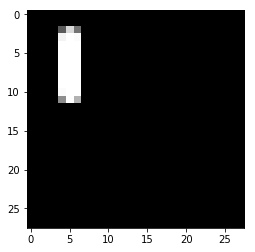

In [56]:
import scipy.misc

img_array = scipy.misc.imread("makeyourownneuralnetwork-master/my_test_images/1_quarter_2.png", flatten=True)
    
import matplotlib.pyplot
%matplotlib inline
matplotlib.pyplot.imshow(img_array, cmap='Greys', interpolation='None')

In [57]:
img_data = 255.0 - img_array.reshape(784)
img_data = (img_data/255.0 * 0.99) + 0.01

outputs = n.query(img_data)
label = numpy.argmax(outputs)

print("output = ", label)

output =  8
